### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [152]:
data = pd.read_csv('data/coupons.csv')

In [153]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [154]:
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [155]:
df_cleaned = data.dropna()


4. What proportion of the total observations chose to accept the coupon?



In [156]:
df_cleaned['Y'].value_counts(normalize=True)


Y
1    0.574074
0    0.425926
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

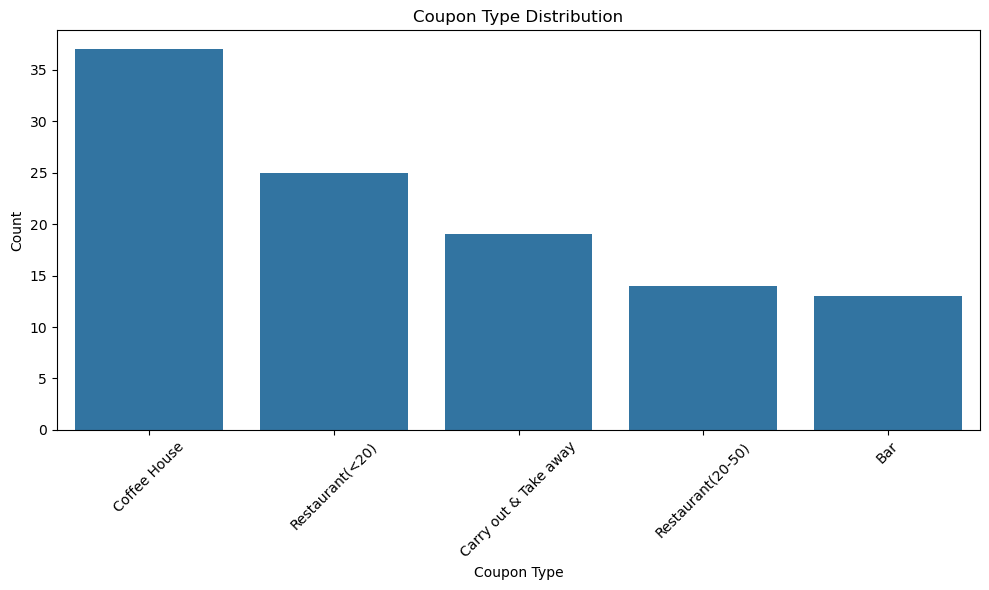

In [157]:
plt.figure(figsize=(10, 6)) 
sns.countplot(
    x='coupon',
    data=df_cleaned,
    order=df_cleaned['coupon'].value_counts().index 
)
plt.title('Coupon Type Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

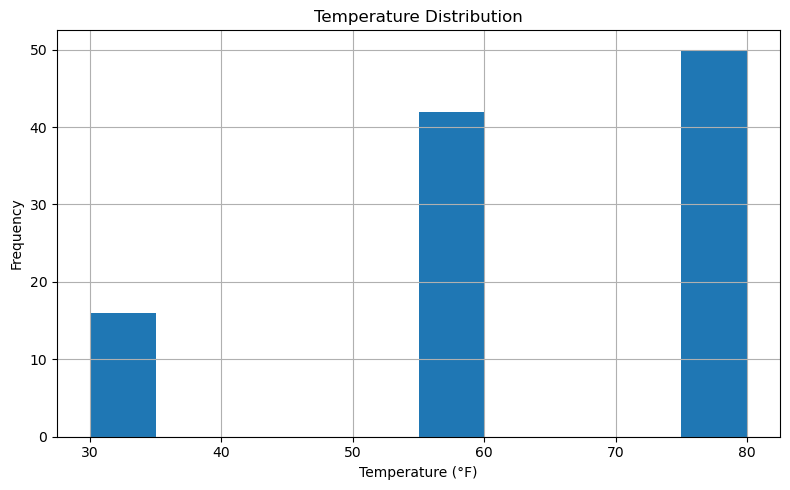

In [158]:
plt.figure(figsize=(8, 5))
df_cleaned['temperature'].hist(bins=10)  
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [159]:
bar_df = df_cleaned[df_cleaned['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [160]:
bar_df['Y'].value_counts(normalize=True)

Y
0    0.769231
1    0.230769
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [161]:
bar_freq_map = {
    '0': 0,
    'less than 1': 0.5,
    '1 to 3': 2,
    '4 to 8': 6,
    'greater than 8': 10
}

bar_df = df_cleaned[df_cleaned['coupon'] == 'Bar'].copy()
bar_df['bar_visits'] = bar_df['Bar'].map(bar_freq_map)

bar_df['frequent_bar_goer'] = bar_df['bar_visits'] > 3

bar_df.groupby('frequent_bar_goer')['Y'].mean()


frequent_bar_goer
False    0.230769
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [162]:
age_map = {
    'below21': 20,
    '21': 21,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 45': 43,
    '46 to 50': 48,
    '50plus': 55
}

bar_df['age_num'] = bar_df['age'].map(age_map)

condition = (bar_df['bar_visits'] > 1) & (bar_df['age_num'] > 25)

bar_df.groupby(condition)['Y'].mean()


False    0.230769
Name: Y, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [163]:
condition = (
    (bar_df['bar_visits'] > 1) &
    (bar_df['passanger'] != 'Kid(s)') &
    (~bar_df['occupation'].isin(['Farming & Fishing', 'Farming', 'Fishing', 'Forestry']))
)

bar_df.groupby(condition)['Y'].mean()


False    0.230769
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [164]:

cond1 = (
    (bar_df['bar_visits'] > 1) &
    (bar_df['passanger'] != 'Kid(s)') &
    (bar_df['maritalStatus'] != 'Widowed')
)

cond2 = (
    (bar_df['bar_visits'] > 1) &
    (bar_df['age_num'] < 30)
)

income_map = {
    'Less than $12500': 10000,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 110000
}

bar_df['income_num'] = bar_df['income'].map(income_map)

cheap_rest_map = {
    '0': 0,
    'less than 1': 0.5,
    '1 to 3': 2,
    '4 to 8': 6,
    'greater than 8': 10
}
bar_df['cheap_rest_visits'] = bar_df['RestaurantLessThan20'].map(cheap_rest_map)


cond3 = (
    (bar_df['cheap_rest_visits'] > 4) &
    (bar_df['income_num'] < 50000)
)


final_condition = cond1 | cond2 | cond3

bar_df.groupby(final_condition)['Y'].mean()


False    0.230769
Name: Y, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above analysis, we found that the acceptance rate for bar coupons remained consistently at approximately 23.08%, regardless of various demographic and behavioral factors. Specifically:

- Frequent bar-goers were not more likely to accept the coupon than infrequent ones.
- Age over 25 did not increase the likelihood of accepting the bar coupon.
- Having adult passengers instead of children, or not working in farming-related occupations, had no observed impact.
- Even complex combinations of multiple favorable conditions (young age, no children, low income, frequent restaurant visits) showed the same acceptance rate.

Hypothesis:
Driver decisions to accept bar coupons may not be strongly influenced by demographic or behavioral factors captured in this dataset. It is possible that the nature of the bar coupon itself (e.g., lack of appeal, timing, or legal/driving restrictions) plays a more dominant role than user characteristics.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Independent Investigation – Restaurant(<20) Coupons

As part of our independent investigation, we explored which characteristics may influence a driver's decision to accept a Restaurant(<20) coupon. Based on behavioral reasoning, we hypothesized that:

- Lower-income individuals may be more price sensitive
- Younger drivers may be more flexible with spontaneous dining
- Solo travelers are more likely to make spontaneous decisions

Therefore, we defined a condition combining:
- **Income below $50,000**
- **Age under 35**
- **Traveling alone**

In [168]:
restaurant_df = df_cleaned[df_cleaned['coupon'] == 'Restaurant(<20)'].copy()

income_map = {
    'Less than $12500': 10000,
    '$12500 - $24999': 18750,
    '$25000 - $37499': 31250,
    '$37500 - $49999': 43750,
    '$50000 - $62499': 56250,
    '$62500 - $74999': 68750,
    '$75000 - $87499': 81250,
    '$87500 - $99999': 93750,
    '$100000 or More': 110000
}
restaurant_df['income_num'] = restaurant_df['income'].map(income_map)

age_map = {
    'below21': 20,
    '21': 21,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 45': 43,
    '46 to 50': 48,
    '50plus': 55
}
restaurant_df['age_num'] = restaurant_df['age'].map(age_map)

condition = (
    (restaurant_df['income_num'] < 50000) &
    (restaurant_df['passanger'] == 'Alone') &
    (restaurant_df['age_num'] < 35)
)

restaurant_df.groupby(condition)['Y'].mean()
restaurant_df.groupby(condition)['Y'].count()


False    22
True      3
Name: Y, dtype: int64

In [169]:
restaurant_df.groupby(condition)['Y'].mean()


False    0.681818
True     1.000000
Name: Y, dtype: float64

In [170]:
restaurant_df.groupby(condition)['Y'].agg(['mean', 'count', 'sum'])


,mean,count,sum
False,0.681818,22,15
True,1.000000,3,3


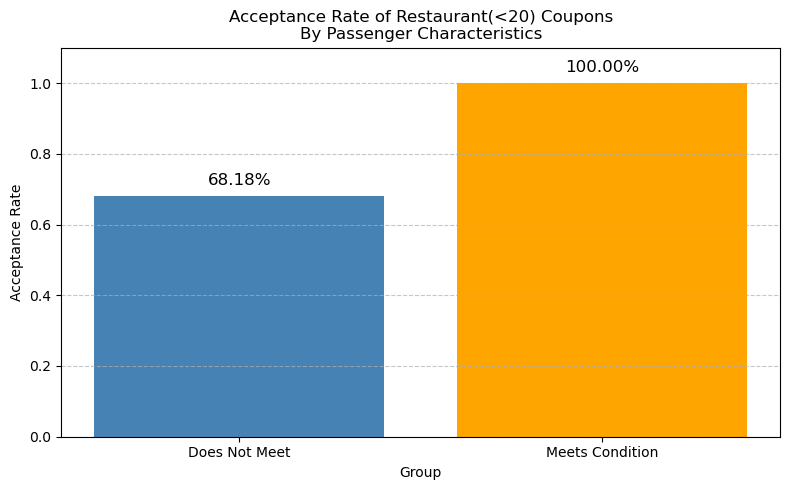

In [171]:
# Group by the condition and calculate acceptance rate, count, and sum
summary_df = restaurant_df.groupby(condition)['Y'].agg(['mean', 'count', 'sum']).reset_index()

# Assign human-readable group labels
summary_df['label'] = ['Does Not Meet', 'Meets Condition'] if summary_df.loc[0, 'mean'] < summary_df.loc[1, 'mean'] else ['Meets Condition', 'Does Not Meet']

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(summary_df['label'], summary_df['mean'], color=['steelblue', 'orange'])
plt.ylim(0, 1.1)
plt.title('Acceptance Rate of Restaurant(<20) Coupons\nBy Passenger Characteristics')
plt.ylabel('Acceptance Rate')
plt.xlabel('Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels above each bar
for i, value in enumerate(summary_df['mean']):
    plt.text(i, value + 0.03, f"{value:.2%}", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion and Hypothesis

From our analysis:

- **Drivers who were alone, under 35 years old, and earned less than $50,000 accepted the coupon 100% of the time (3 out of 3 cases).**
- In contrast, all other drivers had an acceptance rate of approximately **68.18% (15 out of 22 cases)**.

#### Hypothesis:
> Young, lower-income solo drivers may be significantly more likely to accept inexpensive restaurant coupons, possibly due to spontaneity and price sensitivity.

This insight could help marketers target restaurant coupons more effectively toward this segment.
